In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/seamusabshere/b8d8c8a090528d205e237dec19a384df/raw/64d140ae666402aa29af54bf1590674675aaf9f8/age-responses.csv')
df.head(10)

,older,younger,response
0,38,34,False
1,46,45,False
2,80,73,True
3,53,48,True
4,42,30,False
5,60,44,False
6,47,45,True
7,58,58,True
8,38,36,False
9,47,46,False


In [ ]:
newdf = df*1

In [ ]:
newdf

,older,younger,response
0,38,34,0
1,46,45,0
2,80,73,1
3,53,48,1
4,42,30,0
5,60,44,0
6,47,45,1
7,58,58,1
8,38,36,0
9,47,46,0


In [ ]:
X = newdf.iloc[:,:-1].values
y = newdf.iloc[:,-1].values


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(y_test)

[0 1 0 1 1 1 1 0 1 1]


In [ ]:

#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
print(X_train)
print(X_test)

[[-0.45874283 -0.37460082]
 [ 1.43466706  1.47838643]
 [ 0.09350172 -0.06576961]
 [ 0.01460964  0.08864599]
 [ 1.43466706  1.78721764]
 [ 1.11909875  1.40117863]
 [-1.24766362 -0.91505543]
 [-1.08987946 -1.91875686]
 [ 0.48796212 -0.29739302]
 [-1.40544778 -1.14667884]
 [ 1.19799083  1.09234742]
 [ 0.33017796  0.78351621]
 [ 0.88242251  1.32397083]
 [-0.61652699 -0.22018521]
 [ 0.5668542  -0.52901642]
 [-2.19436856 -1.68713345]
 [ 1.51355914  1.16955522]
 [-0.53763491 -0.22018521]
 [ 0.72463835 -0.29739302]
 [-0.9320953  -1.37830224]
 [-0.9320953  -0.52901642]
 [-0.37985075 -0.22018521]
 [ 0.72463835  0.62910061]
 [-0.53763491 -0.14297741]
 [ 1.11909875  1.24676303]
 [-0.06428243  0.01143819]
 [-1.24766362 -1.06947104]]
[[ 1.21972693  1.49353809]
 [-0.87123352 -0.60901553]
 [-0.80153484 -0.46401183]
 [ 0.38334275  0.6235159 ]
 [ 0.45304143 -0.24650629]
 [-0.80153484 -0.60901553]
 [-0.10454802 -0.75401923]
 [-0.1742467  -0.10150259]
 [ 2.05611111  2.00105103]
 [-1.35912429 -1.33403402]]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
#Predicting new result
print(classifier.predict(sc.transform([[38,36]])))

[0]


In [ ]:
#predicting Test results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]]


In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2 1]
 [4 3]]


0.5

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


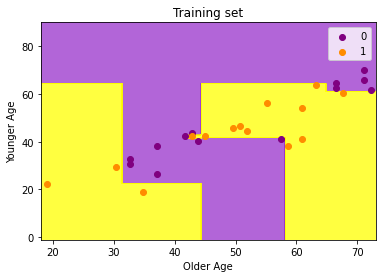

In [ ]:
#Visualizing 

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 20, stop = X_set[:, 1].max() + 20, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('darkorchid', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('purple', 'darkorange'))(i), label = j)
plt.title('Training set')
plt.xlabel('Older Age')
plt.ylabel('Younger Age')
plt.legend()
plt.savefig('training_DT.png', dpi=150)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


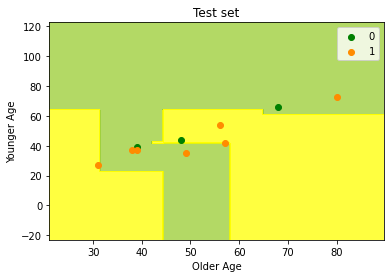

In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 50, stop = X_set[:, 1].max() + 50, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellowgreen', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('green', 'darkorange'))(i), label = j)
plt.title('Test set')
plt.xlabel('Older Age')
plt.ylabel('Younger Age')
plt.legend()
plt.savefig('test.png', dpi=150)
plt.show()

Naive Bayes also assumes that the features are conditionally independent. Real data sets are never perfectly independent but they can be close. In short Naive Bayes has a higher bias but lower variance compared to logistic regression. If the data set follows the bias then Naive Bayes will be a better classifier. Both Naive Bayes and Logistic regression are linear classifiers, Logistic Regression makes a prediction for the probability using a direct functional form where as Naive Bayes figures out how the data was generated given the results.

#Expected value 

In probability space, the average value of some random variable X is called the expected value or the expectation.

In [ ]:
# Generating Gaussian distribution for a particular state with 
import numpy as np
import random
df_row = np.random.normal(loc=5.0, size=190)
df = np.around(df_row, decimals=1)
df

#Vermont has 0.19% of the total US population so 190 instants. This is X in our Colummn. 

array([5.4, 5. , 5.8, 2.9, 6.1, 4.2, 8. , 4.4, 5.8, 5.4, 5.7, 4.4, 4.6,
       4.1, 4.1, 4.3, 5. , 5.1, 5.7, 4.4, 5.3, 6.9, 5.5, 5.3, 6. , 3.5,
       4.1, 6.8, 5.7, 3.1, 6.6, 4.7, 5.7, 4.9, 5.3, 3.6, 4.4, 4. , 4.3,
       5. , 3.7, 6.2, 4.6, 4.8, 4.5, 3.9, 4.4, 5.3, 4.7, 5.6, 6.7, 5.1,
       3.5, 4.2, 3.2, 5.3, 5.9, 4.3, 4.5, 3.5, 6. , 6.4, 4.6, 5.5, 5.2,
       5.5, 3. , 3.6, 4. , 3.6, 5.4, 4.4, 5.8, 6.4, 3.1, 4.1, 5.4, 6.6,
       5.4, 4.9, 4.1, 4.1, 4.4, 4.8, 5.7, 4.9, 6. , 5.6, 4.3, 4.1, 3.9,
       2.4, 3.7, 4.8, 5.3, 4.6, 5.5, 3.6, 5.6, 3.4, 4.2, 5.5, 5.7, 3.8,
       5. , 5.3, 5.6, 6.4, 4.2, 3. , 5.4, 5.4, 4.8, 5.8, 2.9, 4.8, 5.2,
       5.5, 4.5, 5.2, 4.7, 2.7, 3.7, 4.3, 5.7, 4.8, 4.3, 4.2, 5.5, 4.8,
       4.6, 4. , 5.3, 4.4, 5.5, 4.7, 4.1, 5.4, 5.6, 4.5, 5.3, 4.1, 6. ,
       6.2, 3.4, 5.4, 4.9, 6.4, 4.4, 4.8, 4.7, 4.7, 3.9, 3.8, 5.1, 4.1,
       4.9, 5.4, 4.7, 5.2, 3.3, 4.7, 5.5, 5.6, 6.6, 4.9, 3.3, 6.6, 4. ,
       6. , 4.5, 5.2, 5.5, 6. , 5.7, 5.9, 6.7, 5.8, 2.1, 4.5, 3.

In [ ]:
Prob = np.sum(df)/190
Prob

4.894210526315789

Expected Value of $4.9 is correct estimate. Let's find the confidence level to show the point estimate confidence. 

In [ ]:
s = (df - 190)**2 

add_element = np.sum(s)

total_sample = np.sqrt(add_element/189)

sum = (0.95*total_sample)/np.sqrt(190)
CI = Prob + sum

print(CI)

17.685630242147212
